# Data Science Assignment-2

In [68]:
#Importing required libraries
!pip install missingno
!pip freeze
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline
from calendar import day_name
#import matplotlib as plotting
pd.plotting.register_matplotlib_converters()

You are using pip version 9.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


alabaster==0.7.10
anaconda-client==1.7.2
anaconda-navigator==1.9.7
anaconda-project==0.8.2
asn1crypto==0.24.0
astroid==1.6.1
astropy==2.0.3
attrs==17.4.0
Babel==2.5.3
backports.shutil-get-terminal-size==1.0.0
beautifulsoup4==4.6.0
bitarray==0.8.1
bkcharts==0.2
blaze==0.11.3
bleach==2.1.2
bokeh==0.12.13
boto==2.48.0
Bottleneck==1.2.1
branca==0.3.1
certifi==2019.6.16
cffi==1.11.4
chardet==3.0.4
click==6.7
cloudpickle==0.5.2
clyent==1.2.2
colorama==0.3.9
comtypes==1.1.4
conda==4.7.11
conda-build==3.4.1
conda-package-handling==1.3.11
conda-verify==2.0.0
contextlib2==0.5.5
convertdate==2.1.3
cryptography==2.1.4
cycler==0.10.0
Cython==0.27.3
cytoolz==0.9.0
dask==0.16.1
datashape==0.5.4
decorator==4.2.1
distributed==1.20.2
docutils==0.14
entrypoints==0.2.3
ephem==3.7.7.0
et-xmlfile==1.0.1
fastcache==1.0.2
fbprophet==0.5
filelock==2.0.13
Flask==0.12.2
Flask-Cors==3.0.3
folium==0.9.1
gevent==1.2.2
glob2==0.6
greenlet==0.4.12
h5py==2.7.1
heapdict==1.0.0
holidays==0.9.11
html5lib==1.0.1
idna==2.6

You are using pip version 9.0.1, however version 19.2.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
data = pd.read_csv('example_sprit_cut_station.csv', sep=';')
data_prices=pd.read_csv('example_sprit_cut_prices.csv',sep=';')
d1=pd.read_csv('example_sprit_cut_prices.csv',sep=';')
d2=pd.read_csv('example_sprit_cut_station.csv', sep=';')



# Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 12 columns):
ID                           824 non-null object
VERSION                      824 non-null int64
VERSION_TIME                 824 non-null object
NAME                         824 non-null object
BRAND                        802 non-null object
STREET                       820 non-null object
HOUSE_NUMBER                 674 non-null object
POST_CODE                    820 non-null object
PLACE                        820 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    824 non-null object
LAT                          824 non-null float64
LNG                          824 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 77.4+ KB


In [4]:
data.describe()

,VERSION,LAT,LNG
count,824.000000,824.000000,824.000000
mean,131.427184,49.322226,8.191227
std,269.682766,0.254722,0.283228
min,1.000000,48.800790,7.505350
25%,1.000000,49.106052,8.106655
50%,4.000000,49.374500,8.289707
75%,22.250000,49.509410,8.404923
max,881.000000,49.799397,8.499941


In [5]:
data_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2189526 entries, 0 to 2189525
Data columns (total 6 columns):
STID            object
E5              int64
E10             int64
DIESEL          int64
DATE_CHANGED    object
CHANGED         int64
dtypes: int64(4), object(2)
memory usage: 100.2+ MB


In [6]:
data_prices.describe()

,E5,E10,DIESEL,CHANGED
count,2.189526e+06,2.189526e+06,2.189526e+06,2.189526e+06
mean,1.434320e+03,1.404088e+03,1.247491e+03,1.871165e+01
std,2.091502e+02,2.116844e+02,1.037774e+02,8.031150e+00
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,1.000000e+00
25%,1.379000e+03,1.349000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.429000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.324000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [7]:
#drop price less than or equal to zero
def drop_invalids(col_name):
    col_df = d1[d1[col_name]<=0]
    d1.drop(col_df.index,axis=0,inplace=True)

drop_invalids('E5')
drop_invalids('E10')
drop_invalids('DIESEL')

In [8]:
d1.describe()

,E5,E10,DIESEL,CHANGED
count,2.150850e+06,2.150850e+06,2.150850e+06,2.150850e+06
mean,1.457085e+03,1.429118e+03,1.247725e+03,1.900296e+01
std,1.045052e+02,9.922575e+01,1.024969e+02,7.726614e+00
min,8.000000e+00,1.000000e+03,9.990000e+02,1.000000e+00
25%,1.379000e+03,1.359000e+03,1.169000e+03,2.100000e+01
50%,1.459000e+03,1.430000e+03,1.239000e+03,2.100000e+01
75%,1.529000e+03,1.499000e+03,1.319000e+03,2.100000e+01
max,9.999000e+03,9.999000e+03,1.129000e+04,6.300000e+01


In [9]:
#dropping columns
d2.drop(['HOUSE_NUMBER','POST_CODE','STREET'], axis=1, inplace=True)

In [10]:
d2.BRAND.unique()

array(['ARAL', 'JET', 'Supermarkt-Tankstelle am real- Markt',
       'Tankhof Iffezheim', 'Schiffer & Nicklaus GmbH', nan,
       'Sefrin Heizöl & Kraftstoffe', 'bft', 'Markant', 'AVIA',
       'nicht mehr aktiv', 'Bft', 'Freie Tankstelle',
       'AUTO ZOTZ Landau in der Pfalz   Tanken und waschen', 'HEM',
       'Fritz Walter GmbH', 'TAMOIL', 'Freie', 'rnt', '\\N',
       'Schuster & Sohn KG', 'Raiffeisen', 'E Center',
       'Eberhardt Jöhlingen', 'BFT', 'Agip', 'Winkler',
       'Mr. Wash Autoservice AG', 'ESSO', 'ZG Raiffeisen Energie',
       'Supermarkt-Tankstelle', 'freie Tankstelle', 'CLASSIC', 'Shell',
       'Supermarkt Tankstelle', 'Raiffeisen Tankstelle', 'Preis', 'mtb',
       'Tankcenter', 'TS ARNT', 'frei', 'OMV', 'Frühmesser GmbH', 'OIL!',
       'SB Markt', 'SB', 'TOTAL', 'ED', 'SB-Markttankstelle',
       'AUTO ZOTZ Herxheim b.LD.       Tanken an L.493', 'Total',
       'Markenfreie TS', 'TOP', 'T', 'ELAN', 'Tankstelle Heinz'],
      dtype=object)

In [11]:
#dropping nicht_aktiv rows
brands_nicht_aktiv=d2[d2['BRAND']=='nicht mehr aktiv']
d2.drop(brands_nicht_aktiv.index,axis=0,inplace=True)

In [12]:
#replacing brand name \\N 
d2['BRAND'].fillna(value='No Brand', inplace= True)
d2['BRAND'].replace(to_replace=['\\N'],value='No Brand',inplace=True)

In [13]:
d1.shape

(2150850, 6)

In [14]:
#dropping duplicates
d1.drop_duplicates(inplace= True)

In [15]:
d1.shape

(1075425, 6)

In [16]:
d1['DATE_CHANGED']=pd.to_datetime(d1.DATE_CHANGED)

In [17]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075425 entries, 0 to 2177846
Data columns (total 6 columns):
STID            1075425 non-null object
E5              1075425 non-null int64
E10             1075425 non-null int64
DIESEL          1075425 non-null int64
DATE_CHANGED    1075425 non-null datetime64[ns]
CHANGED         1075425 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 57.4+ MB


In [18]:
d1.head()

,STID,E5,E10,DIESEL,DATE_CHANGED,CHANGED
0,01bf5a06-4248-43a5-9524-56123fa3ab2f,1589,1549,1389,2014-10-02 05:22:01,21
1,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1369,2014-10-02 05:26:01,21
2,01bf5a06-4248-43a5-9524-56123fa3ab2f,1569,1529,1359,2014-10-02 09:06:01,1
3,01bf5a06-4248-43a5-9524-56123fa3ab2f,1539,1499,1339,2014-10-03 12:14:01,21
4,01bf5a06-4248-43a5-9524-56123fa3ab2f,1529,1489,1329,2014-10-03 14:14:01,21


In [19]:
#cleaning brands
d2['BRAND'].replace(to_replace=['Supermarkt-Tankstelle'],value='Supermarkt Tankstelle',inplace=True)
d2['BRAND']=d2['BRAND'].str.upper()
d2['BRAND'].replace(to_replace=['FREIE'],value='FREIE TANKSTELLE',inplace=True)
d2['BRAND']=np.where(d2['BRAND']== 'NO BRAND', d2['NAME'], d2['BRAND'])
d2.drop_duplicates(inplace=True)

In [20]:
d2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411 entries, 0 to 709
Data columns (total 9 columns):
ID                           411 non-null object
VERSION                      411 non-null int64
VERSION_TIME                 411 non-null object
NAME                         411 non-null object
BRAND                        411 non-null object
PLACE                        409 non-null object
PUBLIC_HOLIDAY_IDENTIFIER    411 non-null object
LAT                          411 non-null float64
LNG                          411 non-null float64
dtypes: float64(2), int64(1), object(6)
memory usage: 32.1+ KB


In [21]:
#calculating history based on DATE_CHANGED and STID
stid_start_min=d1.groupby('STID')['DATE_CHANGED'].min().reset_index()
stid_start_max=d1.groupby('STID')['DATE_CHANGED'].max().reset_index()
max_date=stid_start_max['DATE_CHANGED']
min_date= stid_start_min['DATE_CHANGED']
no_days= max_date-min_date
no_days= no_days.apply(lambda x: x.days)
stid_start_min['No_Days']=no_days

In [22]:
no_days.head()

0    394
1    477
2    404
3    477
4    406
Name: DATE_CHANGED, dtype: int64

In [23]:
#importing datetime
from datetime import datetime

In [24]:
def drop_outliers(y):
    data_mean, data_std= d1[y].mean(),d1[y].std()
    cut_off=data_std*3
    lower,upper= data_mean- cut_off, data_mean+cut_off
    d1[y]=np.where(np.logical_or(d1[y]<lower,d1[y]>upper),d1[y].median(),d1[y])


In [25]:
drop_outliers('E5')
drop_outliers('E10')
drop_outliers('DIESEL')



In [26]:
#converting prices into Euros
for fuel in ['E5','E10','DIESEL']:
    d1[fuel]=d1[fuel]/1000

In [27]:
d1.describe()

,E5,E10,DIESEL,CHANGED
count,1.075425e+06,1.075425e+06,1.075425e+06,1.075425e+06
mean,1.456998e+00,1.429060e+00,1.247647e+00,1.900296e+01
std,1.010930e-01,9.693802e-02,9.944063e-02,7.726616e+00
min,1.148000e+00,1.139000e+00,9.990000e-01,1.000000e+00
25%,1.379000e+00,1.359000e+00,1.169000e+00,2.100000e+01
50%,1.459000e+00,1.430000e+00,1.239000e+00,2.100000e+01
75%,1.529000e+00,1.499000e+00,1.319000e+00,2.100000e+01
max,1.769000e+00,1.719000e+00,1.549000e+00,6.300000e+01


In [28]:
d2.describe()

,VERSION,LAT,LNG
count,411.000000,411.000000,411.000000
mean,130.236010,49.321829,8.190684
std,269.088951,0.255060,0.283531
min,1.000000,48.800790,7.505350
25%,1.000000,49.105305,8.106500
50%,4.000000,49.373610,8.289295
75%,22.000000,49.509858,8.404538
max,881.000000,49.799397,8.499941


In [29]:
d2.rename(columns={'ID':'STID'}, inplace=True)
#merge both data frames to get the brand data
df= pd.merge(d1,d2, on='STID')
#merge data to get the number of days
df = pd.merge(df, stid_start_min, on='STID')
#setting index to datetime
df['Datetime'] = pd.to_datetime(df['DATE_CHANGED_x'])
df = df.set_index('Datetime')

In [30]:
df_stid=df[['BRAND','STID','DATE_CHANGED_x','No_Days','E5','E10','DIESEL']]

In [31]:
df_stid.head()

,BRAND,STID,DATE_CHANGED_x,No_Days,E5,E10,DIESEL
Datetime,,,,,,,
2014-10-02 05:22:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:22:01,478,1.589,1.549,1.389
2014-10-02 05:26:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:26:01,478,1.569,1.529,1.369
2014-10-02 09:06:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 09:06:01,478,1.569,1.529,1.359
2014-10-03 12:14:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 12:14:01,478,1.539,1.499,1.339
2014-10-03 14:14:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 14:14:01,478,1.529,1.489,1.329


In [32]:
df_stid_group= df_stid.groupby('STID')['BRAND','DATE_CHANGED_x','No_Days','E5','E10','DIESEL'].max().reset_index()

In [33]:
df_stid_group.head()

,STID,BRAND,DATE_CHANGED_x,No_Days,E5,E10,DIESEL
0,00060385-0001-4444-8888-acdc00000001,SCHIFFER & NICKLAUS GMBH,2015-09-28 14:54:01,394,1.579,1.539,1.369
1,00060458-0001-4444-8888-acdc00000001,TANKHOF IFFEZHEIM,2015-09-29 13:58:01,477,1.639,1.599,1.429
2,00060562-0001-4444-8888-acdc00000001,Tankcenter Ziehl,2015-09-29 22:06:01,404,1.607,1.567,1.407
3,00060710-0001-4444-8888-acdc00000001,SBK Selbstbedienungskauf GmbH Tankstelle,2015-09-29 08:30:01,477,1.659,1.619,1.519
4,00060982-0001-4444-8888-acdcffffffff,TANKSTELLE HEINZ,2015-09-29 15:02:01,406,1.579,1.539,1.389


In [34]:
df_stid_days= df_stid_group.groupby('No_Days')

In [35]:
max_idx = df_stid_days['STID'].count().idxmax()
max_idx

478

In [36]:
top_brands_100= (df_stid_days.get_group(max_idx)['STID'][:100]).reset_index()

In [37]:
top_brands_100.drop('index',axis=1,inplace=True)

In [38]:
top_brands_100

,STID
0,00b33b42-8357-40c2-baf5-c7c49b40b2af
1,01a94df2-5e6e-4a4a-b1f5-e2612e25a62f
2,01bf5a06-4248-43a5-9524-56123fa3ab2f
3,033bce61-7584-45e7-94dd-952fd0b4899c
4,044b327b-8726-428a-867c-a48235121cf2
5,061716a5-f4a6-4983-a36e-8ef1e8ce17e0
6,06ab3c7d-0bb7-4bc7-9711-7c02bc2672dd
7,07a543ee-7e3c-4620-a03d-fe60d0d3ba71
8,07e07bdc-6b0d-461a-b4b5-88a680f5b229
9,09839b72-1976-4e20-b617-acccecf75ea0


In [39]:
stid_list=np.ravel(top_brands_100.values)

In [40]:
df_stid_top100 = df_stid[df_stid.STID.isin(stid_list)]

In [41]:
df_stid_top100.head()

,BRAND,STID,DATE_CHANGED_x,No_Days,E5,E10,DIESEL
Datetime,,,,,,,
2014-10-02 05:22:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:22:01,478,1.589,1.549,1.389
2014-10-02 05:26:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 05:26:01,478,1.569,1.529,1.369
2014-10-02 09:06:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-02 09:06:01,478,1.569,1.529,1.359
2014-10-03 12:14:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 12:14:01,478,1.539,1.499,1.339
2014-10-03 14:14:01,ESSO,01bf5a06-4248-43a5-9524-56123fa3ab2f,2014-10-03 14:14:01,478,1.529,1.489,1.329


In [42]:
stid_7_20=df_stid_top100.between_time('7:00','20:00')

In [43]:
stid_7_20.shape

(186756, 7)

In [71]:
#stid_list

In [45]:
top_stid_3=np.random.choice(stid_list,3)

In [46]:
top_stid_3

array(['1a5a35de-01fb-482f-8808-90118eddb47a',
       '2d74b7b9-b9fe-483a-84fd-a1aabd59079b',
       '2f2e8432-3ffc-4dfa-b1ca-3a6ba75ba3e4'], dtype=object)

In [47]:
df_stid_top3 = df_stid[df_stid.STID.isin(top_stid_3)]

In [48]:
df_stid_top3=df_stid_top3.groupby(df_stid_top3.index.date)['E5','E10','DIESEL'].mean()

In [49]:
df_copy=df_stid_top3.copy()

In [50]:
from sklearn.model_selection import TimeSeriesSplit

In [51]:
df_training, df_testing = np.split(df_stid_top3, [int((2/3)*len(df_stid_top3))])

In [52]:
df_testing.sample(5)

,E5,E10,DIESEL
2015-06-14,1.503000,1.483000,1.251000
2015-07-27,1.479556,1.459556,1.193444
2015-09-26,1.346692,1.326692,1.137462
2015-06-27,1.478286,1.457571,1.226143
2015-09-13,1.369667,1.349667,1.156333


In [53]:
df_training.sample(5)

,E5,E10,DIESEL
2014-08-27,1.576333,1.536333,1.362333
2014-10-23,1.489588,1.449588,1.314294
2015-03-09,1.393737,1.373737,1.242158
2014-12-19,1.323118,1.283118,1.195471
2015-03-15,1.427889,1.407889,1.235667


# Step 1: Create a model with simple moving average

In [54]:
 from sklearn.model_selection import TimeSeriesSplit

In [55]:
def mean_abs_deviation(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 
    

In [56]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [57]:
def mean_values(data):
    return data.mean()

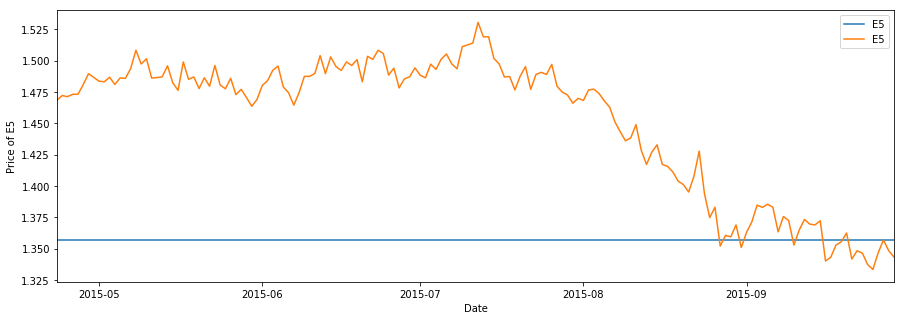

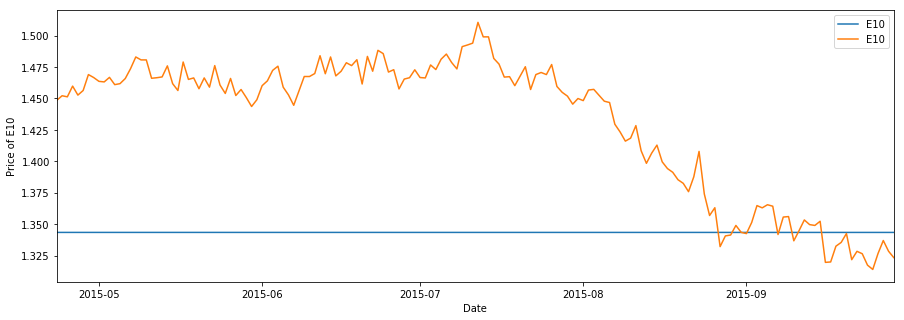

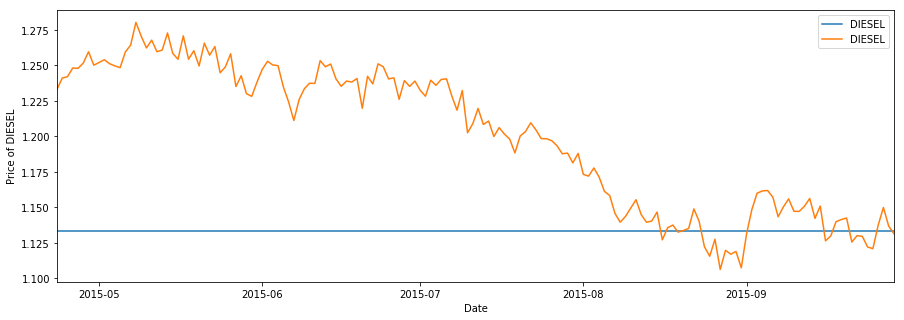

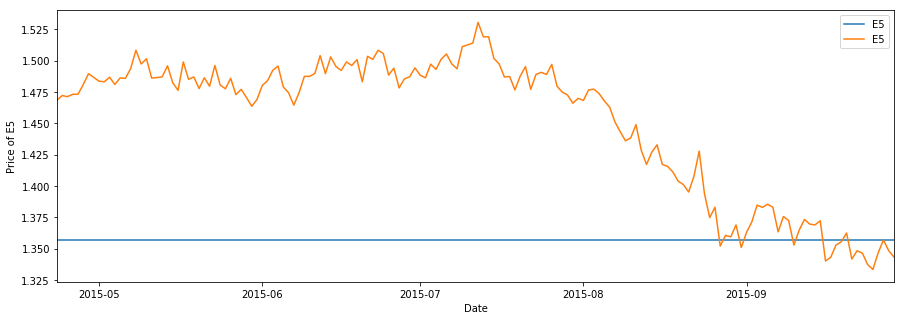

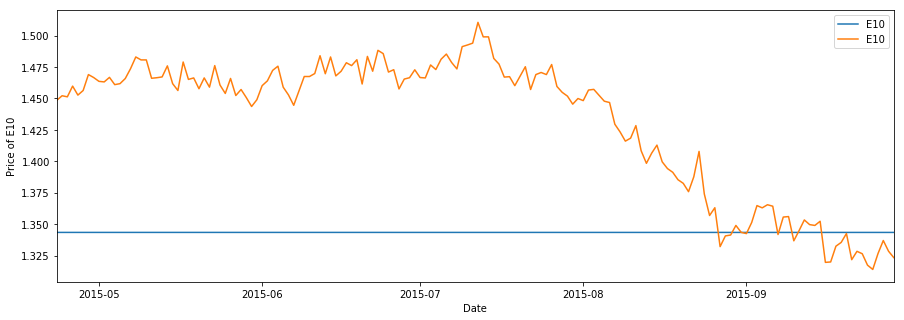

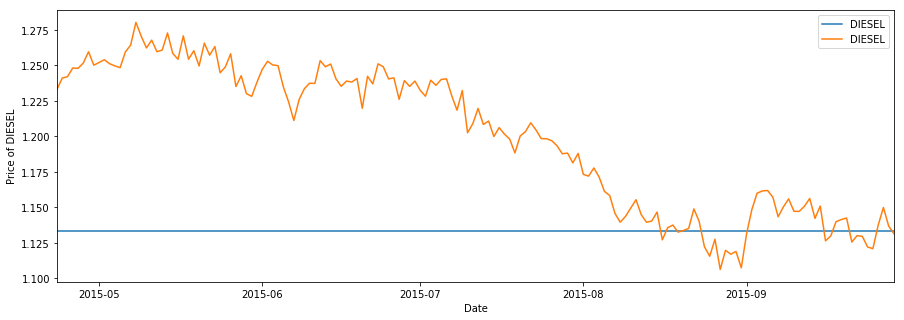

In [189]:
for i in ['E5','E10','DIESEL']:
    X=df_training.index.values
    Y=df_training[i].values
    size= df_training.shape[0]
    tscv = TimeSeriesSplit(n_splits=size-1)
    AVG_overall=[]
    
    for train_index, test_index in tscv.split(df_training.index):
        
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        windowsize= len(train_index)
        
        roll_avg= df_training[i].rolling(window=windowsize).mean()
        
        y_series=pd.Series(Y_train)
       
        roll_avg=roll_avg.shift(periods=1)
        
        Shifted_rolling=pd.DataFrame(roll_avg[X_test].values, columns=["y_hat"])

        Shifted_rolling['y']=Y_test

        mad_mean=Shifted_rolling.mad(axis=1)
        
        mad_mean=Shifted_rolling.mad(axis=1).values[-1]
        
        MAPE_avg= np.mean(np.abs((Y_test - roll_avg[X_test].values.item()) / Y_test)) * 100

        AVG_overall.append((mad_mean+MAPE_avg)/2)
        
       
        
   
    Optima_window_size=AVG_overall.index(min(AVG_overall))+1
    
for j in df_testing[i].index:

    moving_avg_test=df_copy[i].rolling(window=Optima_window_size).mean()
        

    df_copy[i][j]=moving_avg_test.values[-1]

    mask = (df_copy.index >= df_testing.index[0]) & (df_copy.index <= df_testing.index[-1])
   
    frame= df_copy.loc[mask]
    frame = pd.concat([frame, df_testing], axis= 1)
    

mad_test=list()
MAPE_avg=list()
for fuel in frame:    
    mad_test.append(frame[fuel].mad(axis=1).values)
    MAPE_avg.append(np.mean(np.abs(( frame[fuel].values[0][0]/ frame[fuel].values[0][1])) * 100))
    p = frame[fuel].plot(figsize=(15, 5))
    plt.xlabel('Date')
    plt.ylabel('Price of '+fuel)

        
        

# Step 2: Create model using Prophet model

In [61]:
from fbprophet import Prophet


ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [62]:
training_dfs = np.split(df_training, np.arange(len(df_training.columns)), axis=1)
testing_dfs = np.split(df_testing, np.arange(len(df_testing.columns)), axis=1)
training_sets = []

for i,j in enumerate(range(1,4)):
    fuel_type = (training_dfs[j].columns.values.item())
    fuel_copy = training_dfs[j].copy()
    
    fuel_copy.reset_index(level=0, inplace=True)
   
    fuel_copy.columns = ['ds' , 'y']
    training_sets.append(fuel_copy)

In [63]:
prophets = []
for training_set in training_sets:
    # Create Prophet with seasonality in week, year and half year
    m = Prophet(seasonality_prior_scale=0.1,daily_seasonality=False,
                weekly_seasonality=True,
                yearly_seasonality=True);
    m.fit(training_set)
    prophets.append(m)

C:\Users\Sashank\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [64]:
testing_dates = (testing_dfs[0].index.values)
first_day_test = testing_dates[0]
last_day_test = testing_dates[-1]
num_days_to_test = (last_day_test-first_day_test).days

num_days_to_test += 1
futures = []
for prophet in prophets:
    futures.append(m.make_future_dataframe(periods=num_days_to_test))

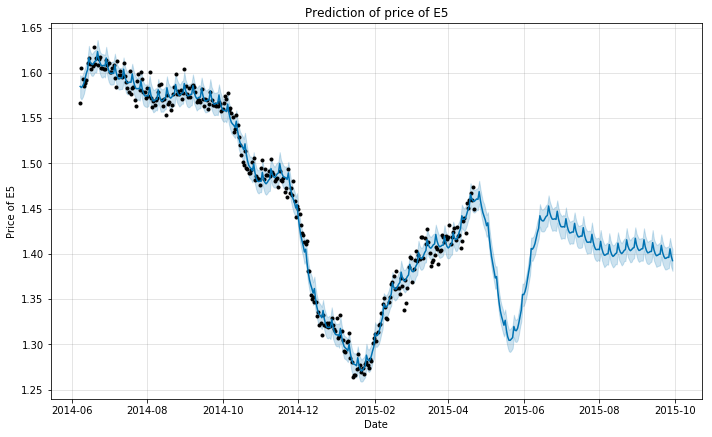

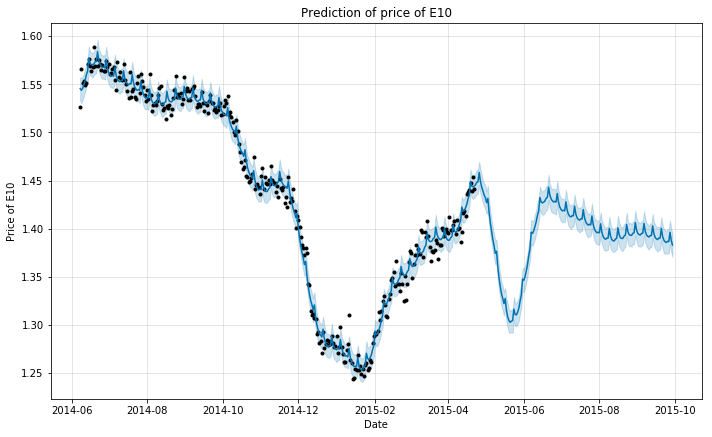

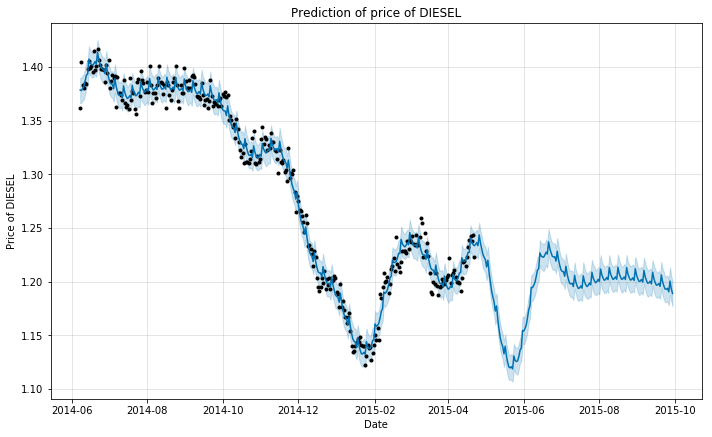

In [69]:
fuels = df_training.columns

forecasts = []
for fuel,prophet, future in zip(fuels,prophets, futures):
    forecast = prophet.predict(future)
    #forecasts.append(forecast[['ds','yhat']])
    #print(forecast)
    g = prophet.plot(forecast)

    plt.title('Prediction of price of '+fuel)
    plt.xlabel('Date')
    plt.ylabel('Price of '+fuel)

# Step 3: Comparing simple average model and Prophet model

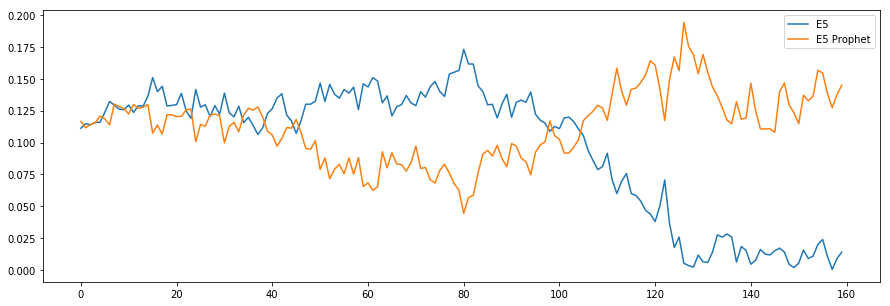

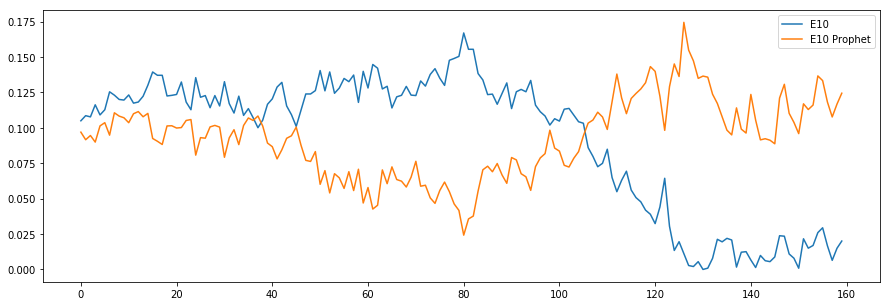

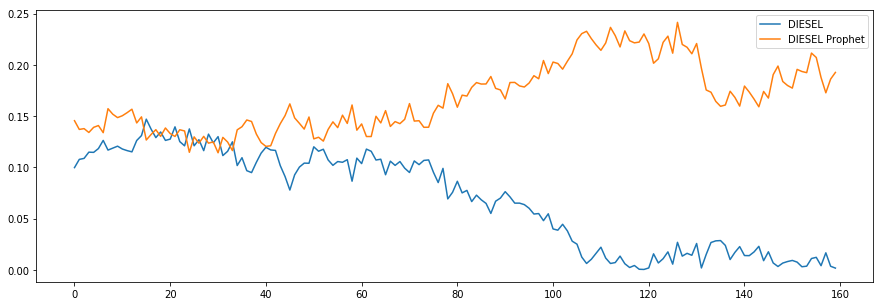

In [146]:
for enum_i, fuel in enumerate(['E5','E10','DIESEL']):
    mad_pairs_list=([[frame[fuel].values[i][0],frame[fuel].values[i][1]] for i in range(len(frame.index.values))])
    mad_list = [mean_abs_deviation(x,y) for x,y in mad_pairs_list]
    
    mad_pairs_prophet= ([[forecasts[enum_i]['yhat'][i],frame[fuel].values[i][1]] for i in range(len(frame.index.values))])
    mad_list_prophet = [mean_abs_deviation(x,y) for x,y in mad_pairs_prophet]
    plt.figure(figsize=(15,5))
    plt.plot(mad_list,label=fuel);
    plt.plot(mad_list_prophet,label=fuel+' Prophet');
    plt.legend()

In [144]:
len(frame.index)

160

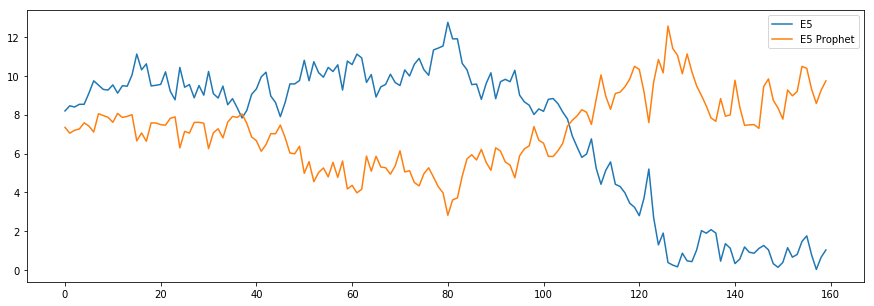

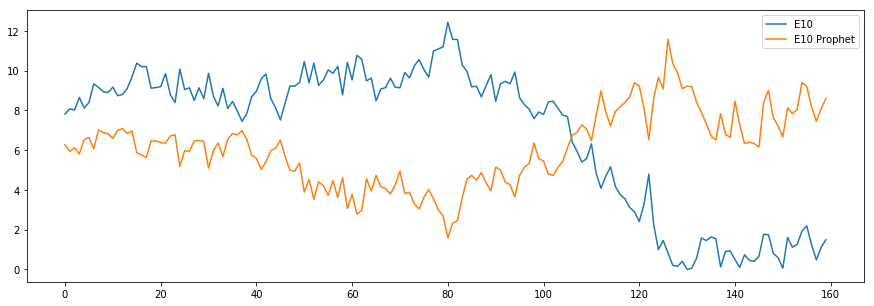

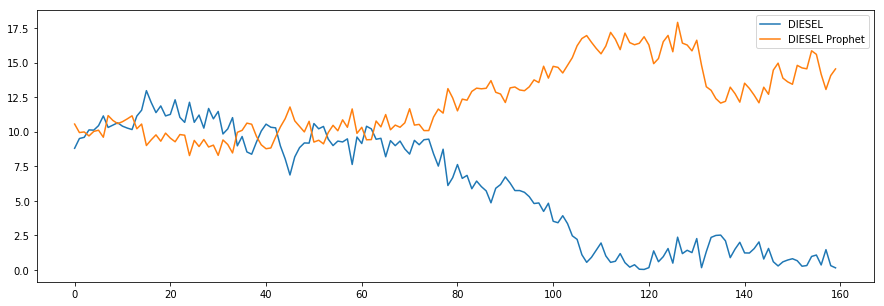

In [169]:
for enum_i, fuel in enumerate(['E5','E10','DIESEL']):
    mape_pairs_list=([[frame[fuel].values[i][0],frame[fuel].values[i][1]] for i in range(len(frame.index.values))])
    mape_list = [mean_absolute_percentage_error(x,y) for x,y in mape_pairs_list]
    
    mape_pairs_prophet= ([[forecasts[enum_i]['yhat'][i],frame[fuel].values[i][1]] for i in range(len(frame.index.values))])
    mape_list_prophet = [mean_absolute_percentage_error(x,y) for x,y in mape_pairs_prophet]
    plt.figure(figsize=(15,5))
    plt.plot(mape_list,label=fuel);
    plt.plot(mape_list_prophet,label=fuel+' Prophet');
    plt.legend()

In [161]:
test_top_100 = np.split(df_stid_top100, [int((2/3)*len(df_stid_top100))])

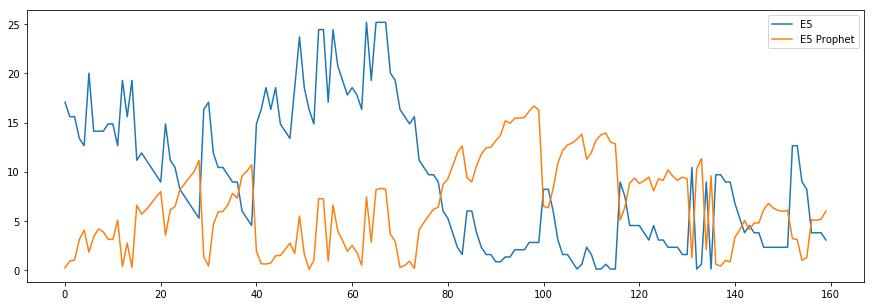

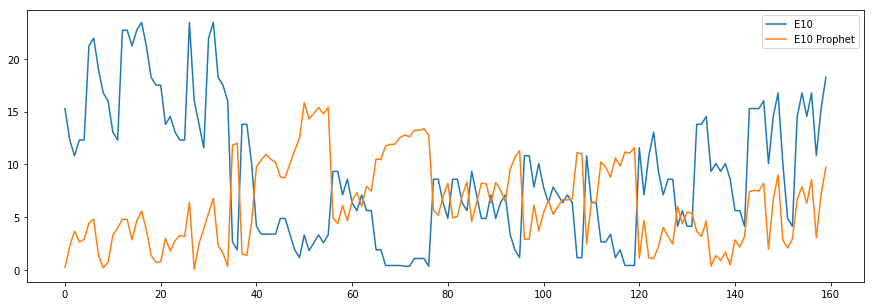

In [167]:
for enum_i, fuel in enumerate(['E5','E10']):
    mape_pairs_list=([[frame[fuel].values[i][0],test_top_100[enum_i][fuel].values[i]] for i in range(len(frame.index.values))])
    mape_list = [mean_absolute_percentage_error(x,y) for x,y in mape_pairs_list]
    
    mape_pairs_prophet= ([[forecasts[enum_i]['yhat'][i],test_top_100[enum_i][fuel][i]] for i in range(len(frame.index.values))])
    mape_list_prophet = [mean_absolute_percentage_error(x,y) for x,y in mape_pairs_prophet]
    plt.figure(figsize=(15,5))
    plt.plot(mape_list,label=fuel);
    plt.plot(mape_list_prophet,label=fuel+' Prophet');
    plt.legend()

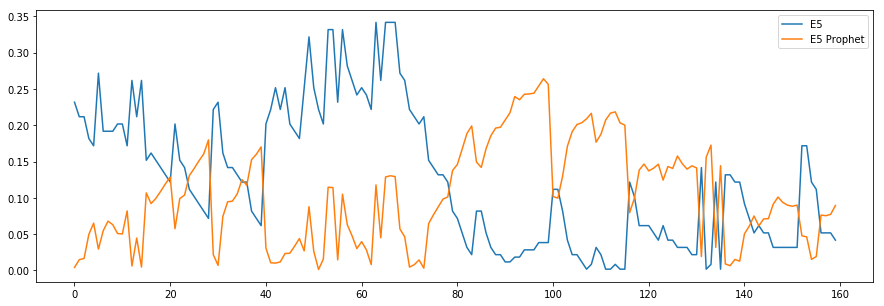

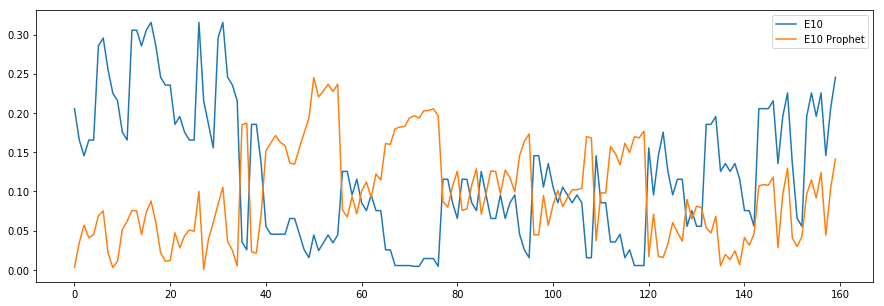

In [185]:
for enum_i, fuel in enumerate(['E5','E10']):
    mad_pairs_list=([[frame[fuel].values[i][0],test_top_100[enum_i][fuel].values[i]] for i in range(len(frame.index.values))])
    mad_list = [mean_abs_deviation(x,y) for x,y in mad_pairs_list]
    
    mad_pairs_prophet= ([[forecasts[enum_i]['yhat'][i],test_top_100[enum_i][fuel][i]] for i in range(len(frame.index.values))])
    mad_list_prophet = [mean_abs_deviation(x,y) for x,y in mad_pairs_prophet]
    plt.figure(figsize=(15,5))
    plt.plot(mad_list,label=fuel);
    plt.plot(mad_list_prophet,label=fuel+' Prophet');
    plt.legend()

In [59]:
import unittest

In [60]:
def mean_abs_deviation(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred)) 
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def mean_values(data):
    return data.mean()

class TestMeanAndMetricMethods(unittest.TestCase):
    def test_mean_abs_deviation(self):
        d = {'test1': [[1,5,2,-1,10,3],[4,6,5,2,-7,-3]], 'test2': [[4,6,5,2,-7,-3],[4,6,-5,2,7,3]]}
        df = pd.DataFrame(data=d)
        self.assertEqual(mean_abs_deviation(*df["test1"]), 5.5)
        self.assertEqual(mean_abs_deviation(*df["test2"]), 5)
    def test_mean_absolute_percentage_error(self):
        d = {'test1': [[1,5,2,-1,10,3],[4,6,5,2,-7,-3]], 'test2': [[4,6,5,2,-7,-3],[4,6,-5,2,7,3]]}
        df = pd.DataFrame(data=d)
        self.assertEqual(mean_absolute_percentage_error(*df["test1"]), 190)
        self.assertEqual(mean_absolute_percentage_error(*df["test2"]), 100)

    def test_mean_values(self):
        data_frame = {'col1': [1, 2, 3], 'col2': [10, -1, -3]}
        data = pd.DataFrame(data=data_frame)
        self.assertEqual(mean_values(data["col1"]), 2)
        self.assertEqual(mean_values(data["col2"]), 2)


unittest.main(argv=[''], verbosity=2, exit=False)
        

test_mean_abs_deviation (__main__.TestMeanAndMetricMethods) ... ok
test_mean_absolute_percentage_error (__main__.TestMeanAndMetricMethods) ... ok
test_mean_values (__main__.TestMeanAndMetricMethods) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.012s

OK
